In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter

### Entendendo dataset de avaliações

In [2]:
ratings_df = pd.read_csv('../datasets/ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
print(f"Shape: {ratings_df.shape}")
print(f"Columns: {ratings_df.columns}")
print(f"Average Rating: {ratings_df['rating'].mean()}")

Shape: (100004, 4)
Columns: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Average Rating: 3.543608255669773


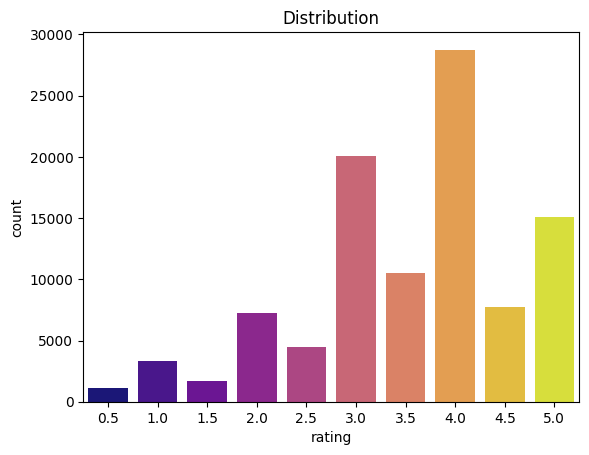

In [4]:
sns.countplot(ratings_df, x='rating', hue='rating', palette='plasma', legend=False)
plt.title('Distribution')
plt.show()

### Entendendo o dataset de keywords

In [5]:
keywords_df = pd.read_csv('../datasets/keywords.csv')
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [6]:
# Convert stringified objects to objects
keywords_df['keywords'] = keywords_df['keywords'].apply(ast.literal_eval)

In [7]:
keywords_df['keyword_names'] = keywords_df['keywords'].apply(lambda x: [item['name'] for item in x])
keywords_df['keyword_ids'] = keywords_df['keywords'].apply(lambda x: [item['id'] for item in x])
keywords_df['keyword_count'] = keywords_df['keywords'].apply(len)

In [8]:
keywords_df.head()

,id,keywords,keyword_names,keyword_ids,keyword_count
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...",9
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'...","[10090, 10941, 15101, 33467, 158086, 158091]",6
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o...","[1495, 12392, 179431, 208510]",4
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[based on novel, interracial relationship, sin...","[818, 10131, 14768, 15160, 33455]",5
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[baby, midlife crisis, confidence, aging, daug...","[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3...",9


In [9]:
print(f"Shape: {keywords_df.shape}")
print(f"Columns: {keywords_df.columns}")
print(f"Average keywords per movie: {keywords_df['keyword_count'].mean()}")
print(f"Movies with 0 keywords: {keywords_df[keywords_df['keyword_count'] == 0].shape[0]}")

Shape: (46419, 5)
Columns: Index(['id', 'keywords', 'keyword_names', 'keyword_ids', 'keyword_count'], dtype='object')
Average keywords per movie: 3.4184277989616323
Movies with 0 keywords: 14795


In [10]:
all_keywords = [keyword for sublist in keywords_df['keyword_names'].tolist() for keyword in sublist]
most_common_keywords = Counter(all_keywords).most_common(10)
print("\nMost common keywords:")
print(most_common_keywords)


Most common keywords:
[('woman director', 3115), ('independent film', 1930), ('murder', 1308), ('based on novel', 835), ('musical', 734), ('sex', 685), ('violence', 651), ('nudity', 636), ('biography', 629), ('revenge', 626)]


In [11]:
unique_keywords = set(all_keywords)
print(f"Total number of different keywords: {len(unique_keywords)}")

Total number of different keywords: 19956


### Entendendo o dataset de filmes

In [12]:
movies_df = pd.read_csv('../datasets/movies_metadata.csv')
movies_df.head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_26664\2181283837.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('../datasets/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [13]:
print(f"Shape: {movies_df.shape}")
print(f"Columns: {movies_df.columns}")

Shape: (45466, 24)
Columns: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [14]:
movies_columns = ['id', 'adult', 'vote_average', 'vote_count', 'genre_names', 'belongs_to_collection']

In [15]:
# Convert stringified objects to objects
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

In [16]:
movies_df['genre_names'] = movies_df['genres'].apply(lambda x: [item['name'] for item in x])
movies_df['genre_ids'] = movies_df['genres'].apply(lambda x: [item['id'] for item in x])

In [17]:
all_keywords = [keyword for sublist in movies_df['genre_names'].tolist() for keyword in sublist]
most_common_keywords = Counter(all_keywords).most_common(10)
print("\nMost common keywords:")
print(most_common_keywords)


Most common keywords:
[('Drama', 20265), ('Comedy', 13182), ('Thriller', 7624), ('Romance', 6735), ('Action', 6596), ('Horror', 4673), ('Crime', 4307), ('Documentary', 3932), ('Adventure', 3496), ('Science Fiction', 3049)]
